# Cats vs Dogs - Computer vision object recognition 
*Final Project Data Science Submission*  
*Author - Carmen Cincotti*

## Problem Statement
My final project will involve **developing and training a convolutional neural network to determine if an image is one of a cat, or a dog.** CAPTCHA's are designed to prevent bots from maliciously spamming forms by requiring them to select images of certain objects. It's been shown that humans are very good at differentiating objects within images, while computers are not. The goal is to show that this may not be the case, and that a computer can learn how to differentiate between objects - and in this particular case - with Microsoft's own CAPTCHA (named Assira) which focuses on cats and dogs.

The subject of computer vision is vast and quite extensive. Therefore, this notebook will focus solely on developing a model for object recognition within a 2D image (png, jpeg, etc). More specifically, we'll be focusing on training a convolutional neural network capable of identifying whether an image contains a cat, or a dog.

While the problem of identifying images with cats and dogs seems primitative, ultimately the process can be utilized to solve more complex problems given an understanding of the underlying processes involved. **Thus, not only will this notebook serve as a means to work through the development of such a model, but also the science behind it** - what is a CNN? How do you implement one? 

**Finally, we'll explore deployment of such a model onto a cloud service, such as Google App Engine.**

## 2. Background

### 2.1 Convolutional Neural Networks (CNN)
A convolutional neural network, at a high level (in this context), is a Deep Learning algorithm which can take an input image, and learn features about the image. Ideally, after sufficient training examples, the CNN should be able to differentiate specificities between images by outputting a label. 

![alt text](https://lh3.googleusercontent.com/0yqdV7Kz-swOn_WfEZAPabx8PG3FeiO7tEVsHzKQp5D1OFbcSJ4qWSQS16u_1I1KLl4evKopPmZnU1cqzq4gpx9LSQQO2uZJNDFqMkfSu9wKpP5LOqbDt1jQgyxTzCrukf6WSc9I5WotNNkCQfZUPHPfL5E34M6XFLqvkYu3_ZrSM7i-P7LEiP5O_35b7ddFK7T0fMIvvYdtZnT7DN7z2uQm9oosOMKQi47Mgd_XcKm73RMj1HgYZ4hFRTVNMyJQYrIlOMc-wqSxlsTIeDj2nm-5tbyRk1wgq6sM9nAGCiew8Umxs8Fx3JKTjp9r009PMpoTCfqrJo6_LCLQuG8eUBilnUZa2yo1zLxpiis72GMX_ZxEbdNlOuC95l1LX8aVJDMmyAZ0yoKedzXg48lEE3VNrSBXSsAoHuzg3ecfGSkwSlVPurBSLXhbsFEl09SwTniHHq9hbpNNm_JEQ63FbDrCGOKpSV6ADm4JMBYEDpc3TgYAS5SCJkvEHE_G5xgEinnCdmzLl6gwrxKIRSHvE7KB4oKJIkTcj1egI4_E1Kgb1Y_FhdI9snZveJTUxt3RHZnyYGxixkv5ivNdRUJ4dAQKIQr4hdLi4bdnMGkSsQIqE3n6XNcT_TeSIbaymYujzeYdOLyKpLX-NAxDXyVrTHJahgqw4opbOKW2Z8Ph0HeXr3iBu8sdmLYv5A651aDcGDHx0Fg7pLWk4Cd6_THqhct2cpvV9hctogQ-MRKhXAKkNFw=w562-h152-no "CNN demo")

The input image (in this project) will be RGB images, with varying sizes. When training, it will be neccessary to reduce these images to reduce computational time. This will be OK, as long as the images are shrunken to a point where important features are still distinguishable. This will be explained in later detail further.

The output label in this project will be a single float (0.0 - 1.0) representing the probability that an image contains a cat.

### 2.2 How it works

The internals of a CNN can be as complex as desired, and will change given the problem. However, the fundamental steps can be defined as follows: 

#### 2.2.1 Step 1 - Convolution
**Goal TLDR: Extract the important features of the image, as well as reduce the dimensionality of our image**
![alt text](https://hackernoon.com/hn-images/1*ZCjPUFrB6eHPRi4eyP6aaA.gif "Convolution step")  
*Source: hackernoon.com*

The image above shown on the left is our input image (reduced to binary), and a 3x3 kernel (feature detector, or filter) that slides across the image as shown. Each time the kernel slides over to a new area, a matrix multiplication occurs, which the result is stored in the convolved feature (feature map) which is seen to the right. This is done in this manner to retain the spatial relationships between pixels, which is important when identifiying objects in an image.

By doing this step, **we can extract the important features of the image, as well as reduce the dimensionality of our image.** This significantly reduces computational time. See the image below of CNN feature maps after successive convolution steps. **Through the network's training, it learns what features are important for identifying images **

![alt text](https://media.springernature.com/original/springer-static/image/art%3A10.1007%2Fs11042-017-4837-0/MediaObjects/11042_2017_4837_Fig3_HTML.gif "Convolution output")  
*Source: Rui, T., Zou, J., Zhou, Y. et al. Pedestrian detection based on multi-convolutional features by feature maps pruning. Multimed Tools Appl 76, 25079–25089 (2017). https://doi.org/10.1007/s11042-017-4837-0*

It's important to note, that one feature detector is responsible for extracting one specific feature. Thus in a given CNN, **one can expect that multiple feature detectors are being trained to be able to extract the features deemed important by the model.**

Side note: To prevent linearity that may occur from applying convolution to an image, an activation function is used to introduce/increase non-linearity.

#### 2.2.2 Step 2 - Max Pooling
**Goal TLDR: To further reduce the dimensionality of the image, and extracting features which are positionally invariant** 

Think of a set of cat images. The network learns through the convolution layer that pointy ears are important features. However, what if the cat's head is tilted? The feature detector for pointy ears will fail to find this feature. The max pooling layer aims to fix this.

![alt text](https://miro.medium.com/max/792/1*uoWYsCV5vBU8SHFPAPao-w.gif "Max pooling example")  

The image above helps to describe how this occurs. The orange box is the feature map that was determined by the convolutional step. A kernel traverses a feature map, and the maximum number found within the kernel bounds is saved into the pooled feature map (left, green square). As shown in the image, the location of the dominant features within the map become inconsequential as we can extract the dominant feature regardless of it's location. 

As one can also see, this further reduces the dimensionality of the feature map, which in turn reduces computational power. A welcomed side effect of this is that we also reduce any noise that may have came from the convolution step. Also, it prevents overfitting since there is less information to process.

### 2.2.3 Step 3 - Flattening
This is a small, yet neccessary step. Here we are turning our 2D matrices into 1D, so that they can be fed into a artificial neural network.

![alt text](https://lh3.googleusercontent.com/MxJBuqd3-CqAOmdgc9YWRGPKRVHUMuT1VkPmuSAnstZ1Q0XFk51TcXT35UaasWOUeygdj0glhn-BMnc5lZC6LSY8QM71823edCmJCPCcKIWZYaTt3N8Ps1qFFZuxha3ddyZxqt0RkzGB0HHW32HhbA8-WMSPpdoCR9nSYZshxetbhr0gy_6BxDiBrR-O_SpcPJPNVRlcZJnPXkzM18-x8VPRcRmUJtFcxRdPz2JN6xHDY8UY-My5QFMUO9Bms-eaaCJ2gPV-8XT5ar1QnAWZa95exI-e_I0pWp-WRxRR3jXttCeHzVWmkeVSFxumnbgPjc3J32tApbYPzorI2tSkhpRGYvocKlofaRJcQuXq2gLylHkhjun1aGJDu10DchjhwpiJIZulpVi07k2NuVYsKcfDOKlztXRVY3wJzR5A4BQKhS3ap0BldxXOV8XGvoWxKKyaHACQi2-06VVNHc3vBihk26912fLpQT0MWESfd9CQGg7NOKzU91BdpMaEahP74UQyC6TDZSwDoQ4ppERwO2szvMs-L4MSf10U_SJ13X2wGUegfDLhs2AR1WRAVC7ITPOzhHrlPCpn43P-oR02ukFUZRMu5MGH-4aWyRrNwZMPktWCip1CxH-6G-I0XX2sTHJWaLomlvCPbuWx3l3HTw_jLNM4e-sqhAIJWXYvq_gRRRSHOXgalw=w1414-h632-no "CNN with Flattening")



### 2.2.4 Step 4 - Full connection with an artificial neural network
**Goal TLDR: Supercharge our ability to predict the correct output**

The output from the flattening step is then fed into an artificial neural network, where even more attributes and attribute combinations can be learned. 

Super high level explanation of a feed-forward neural network is that we feed in input information, which is then used to predict an output (in our case the probability of an image being a dog). The artificial neural network iteratively learns which features are important through updating it's weights within the network itself as well as determining which 'neurons' correspond to a specific output.  Over time, it is able to determine which attributes are related to dogs and cats, and their weight in determining an output's probability.

Why use a CNN, versus say, a typical feed forward neural network? In a CNN, we can retain the spatial relationships of the pixels as well as reduce the dimenionsality of an image. Thus it's able to recognize images better than a feed forward neural network.

### 2.2.5 Step 5 Backpropagation
After determining a probability, an error is determined, and we 'backpropogate' through the network. High level, this means that the CNN may update it's weight's for certain features, change feature detector's etc. When the process of backpropogation occurs is set by your parameters (is it after each image (stochastic)? After seeing every image (typical)? In between the two (batch)?). 

This process then continues until all the data is seen (or after one 'epoch' is completed. Depending on your training parameter's, you may continue to train after one epoch is completed, or not.

## 3. Approach Overview

### 3.1 Data Source
The data comes from a set provided by Microsoft Assira's dataset which was used to develop a CAPTCHA-like test that used images of cats and dogs to prevent website form abuse by automated scripts. The original data set contained 3,000,000 labeled images of cats and dogs, but the data set that I will be using is a subset of 25,000 total (12,500 for each category).

[Here's a link to that data](https://www.kaggle.com/c/dogs-vs-cats/data)

### 3.2 Target Variable

Since this is a classification problem, the target variable that I will be predicting is if an image is of a cat, or of a dog. In other words, I will be prediciting the label of the image. 

### 3.3 The Images
The data set consists of 25,000 colored images of both cats and dogs (12,500 each). The image sizes are not consistent, but I've found most are over 200px x 200px. Classification becomes difficult as the images contain a variety of backgrounds, angles, poses, lighting, etc.

Out of the 25,000 images, we'll split the data 80/20, with 80% being training data and 20% being validation data.

In addition, there are another 12,500 images that are unlabeled, that will be used as a test set. Since they're unlabeled, we have to validate the performance of our model manually with them.

### 3.4 Model Approach

The two models that I examined to classify the images were one of a classic 3 block VGG CNN implementation from scratch, and another using a slightly modified VGG-16 model which was developed in 2014 to classifiy 1000 categories over ImageNet's 15 million labeled images with a 92.7% accuracy. It has been modified to handle only producing a single output (probability of being a cat/dog image). 

### 4. Data Preparation

In [6]:
# File explorer/manipulation package
import os

# CNN library
import keras

# Notebook preparation
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

Using TensorFlow backend.


In [ ]:
# So here we need to take take our raw training data and put them into subdirectories based on their label. This is a required convention that is needed when we load in the data. 
# We'll be creating from the raw data training and validation sets. 

# Here we're creating the directories in our filesystem. If they already exist, this block will error out, which prevents the following for loop from running - which is OK if our files are already organized.
os.mkdir("data/train/cat")
os.mkdir("data/train/dog")

# The files are labeled within the name of the file, so we go through each file and organize the images into respective subdirectories by their label
files = os.listdir("data/raw/train/")
for file in files:
    if "cat" in file:
        os.rename(f"data/raw/train/{file}", f"data/train/cat/{file}")
    if "dog" in file:
        os.rename(f"data/raw/train/{file}", f"data/train/dog/{file}")

In [ ]:
# Same business as the above block, create validation subdirectories and for every 5th of the file we move it to the validation folder.
# A little round-a-bout, we could combine this with the for loop above, but for readability sake, I seperated it.
os.mkdir("data/validate/cat")
cat_files = os.listdir("data/train/cat")
i = 1
for file in cat_files:
        if i % 5 == 0:
            os.rename(f"data/train/cat/{file}", f"data/validate/cat/{file}")
            i = 1
        else:
            i = i + 1
            
os.mkdir("data/validate/dog")
dog_files = os.listdir("data/train/dog")
for file in dog_files:
        if i % 5 == 0:
            os.rename(f"data/train/dog/{file}", f"data/validate/dog/{file}")
            i = 1
        else:
            i = i + 1

Training data inspection


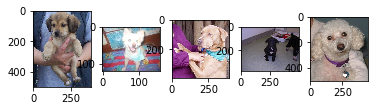

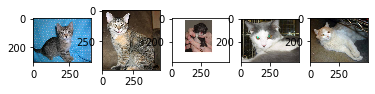

In [64]:
# Now that we have the directories organized - let's inspect our raw images to make sure everything is organized correctly.
from matplotlib import pyplot
from matplotlib.image import imread

# Define our directory variables
train_di\r = r'data/train/'
validation_dir = r'data/validate/'
test_dir= r'data/raw/test/'

# Define a function to plot images in our data set.
def plot_images(folder):  
    files = os.listdir(folder)
    i = 1
    for file in files[:5]:
        # define subplot
        pyplot.subplot(1, 5, i)
        i = i+1
        # load image
        image = imread(folder + file)
        # plot image
        pyplot.imshow(image)
    # show the figure
    pyplot.show()
    
# Now let's run this function in order to take a look.
print("Training data inspection")
plot_images(train_dir + "dog/")
plot_images(train_dir + "cat/")

As one can see, these images are different sizes, and contain images of cats in dogs in different settings, backgrounds, angles, lighting, etc.

In [248]:
# import our data generator (needed to format input layer)
from keras.preprocessing.image import ImageDataGenerator

# So now we have our directories set up, we need to create Keras data generators which modify the input images to be fed into our Keras CNN model.
# We can also augment our image data to increase the number of samples with different variations of each image.

# A generator will generate our datasets in the correct format, with our defined augmentations applied to the images. This generator is for our training data. The parameters for the most part are for image data augmentation. We do this SOLELY for the training data, since we want the validation to be of real-world inputs.
train_datagen = ImageDataGenerator(
    rescale=1./255., # rescale is done here to reduce our 0-255 RGB values to between 0-1 for better comp. time.
    shear_range=0.1, # range to shear an image (augmentation)
    zoom_range=0.1, # range to zoom in on an image (augmentation)
    horizontal_flip=True, # flip the image horizontally (augmentation)
    fill_mode='nearest', # If there's whitespace after augmentation, be smart about filling the space (augmentation)
    validation_split=0.0 # set to 0 since we've done the validation split ourselves.
)

# This is the test generator, which we aren't augmented the image. So we don't define any augmentation parameters.
test_datagen = ImageDataGenerator(
    rescale=1./255,
)

# Define batch size. The batch size is the number of images that we will predict before updating the model (through backpropagation)
batch_size=64

# Define input image dimensions. This is the image dimension that we want to resize images to. Higher number = more computation time.
img_dim=224

# Run the generator on the training images and store the resultant augmented images.
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    batch_size=batch_size,
    target_size=(img_dim, img_dim), # size to resize
    class_mode='binary', 
)

# Run the generator on the validation images and store the resultant images.
validation_data = test_datagen.flow_from_directory(
    directory=validation_dir,
    batch_size=batch_size,
    class_mode='binary',
    target_size=(img_dim, img_dim),
    shuffle=False
)

# Lastly, get the test unlabeled images
test_data = test_datagen.flow_from_directory(
    directory=r"data/raw/test/",
    batch_size=batch_size,
    target_size=(img_dim, img_dim),
    classes=None,
    class_mode="binary"
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


In [83]:
# Confirm the train data length
train_data.n

20000

In [17]:
# Confirm the number of batches
len(train_data)

313

In [14]:
# Confirm the validation data length
validation_data.n

5000

In [15]:
# Confirm the test data length
test_data.n

12500

In [76]:
# Now that we've generated our training and validation data, let's inspect it to be sure the augmentations took place.
# We're creating a new function where we can pass in a list of files and plot the augmented images.
def plot_augmented_image(files):
    i = 1
    for file in files[:5]:
        # define subplot
        pyplot.subplot(1, 5, i)
        i = i+1
        # plot image
        pyplot.imshow(file)
    # show the figure
    pyplot.show()

Training data inspection with augmentation


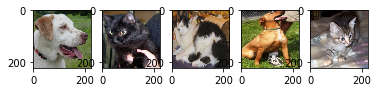

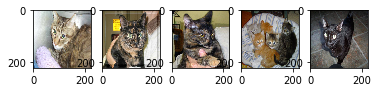

In [74]:
# The data from the generators is an iterator, so we can iterate through it.
test_images, _test_labels = next(train_data)
validation_images, _validation_labels = next(validation_data)

# Now we pass the test data in and we plot the data.
print("Training data inspection with augmentation")
plot_augmented_image(test_images)
plot_augmented_image(validation_images)

As you can see, the images are the same size (224px x 224px), and have slight augmentations as defined in the initialization in the data generator.

Our data is ready to go!

### 5. Model Building

#### 5.1 Classic CNN (Attempt #1)

In [197]:
# Import the Keras libraries to build a CNN, following the steps outlined in the Background, we can build a multi block CNN.
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout, InputLayer

# So in order to create a model, we initialize a Sequential base model, which essentially acts as a list of steps to be followed.
model = Sequential()

# We define our first convolution step here, which is considered our input layer.
# Our activation function is "ReLU" - which again serves to introduce nonlinearity to the feature map
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_dim,img_dim, 3)))
model.add(MaxPooling2D((2, 2))) # Next step is Max pooling
model.add(Dropout(0.2)) # Dropout is as a form of regularization, where we force 20% of neurons in the network to 'dropout' to force training of other neurons to pick up the slack. The end result is neurons that are independent of other neurons.
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu')) # Dense is an artificial neural network
model.add(Dropout(rate=0.5))
model.add(Dense(1, activation='sigmoid')) # Here, we finally get to the single output layer using a softmax activation.

In [167]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 128)      

In [78]:
# Now we need to compile the model which essentially does just that. We define an optimizer that takes a learning rate parameter.
# We define accuracy as our metric to measure our errors against (is it right or wrong, and by how much?)

# We measure our 'loss' with a cross entropy function, as opposed to MSE. The goal is to minimize the loss function to maximize performance. We choose cross-entropy as our loss function because, simply put, it works better for CNN's in terms of handling very small changes in outcome. For example, a small change in outcome would be represented as very small change in MSE, which would slow down our ability to minimize the cost function. With a cross entropy function, small improvements are more significant.  
from keras.optimizers import Adam
model.compile(
    optimizer=Adam(lr=.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [79]:
# Finally - we train the model with our training data. I can only really run a small amount of epoch's since I'm training with my CPU and each iteration takes a while.
history = model.fit_generator(
    train_data,
    validation_data=validation_data, # to evaluate the loss and any model metrics at the end of each epoch
    validation_steps=len(validation_data),
    epochs=5, 
    steps_per_epoch=len(train_data),
    verbose=1
)

Epoch 1/5
313/313 [==============================] - 1316s 4s/step - loss: 0.7037 - accuracy: 0.5265 - val_loss: 0.6858 - val_accuracy: 0.5664
Epoch 2/5
313/313 [==============================] - 1341s 4s/step - loss: 0.6704 - accuracy: 0.5879 - val_loss: 0.7008 - val_accuracy: 0.6078
Epoch 3/5
313/313 [==============================] - 1267s 4s/step - loss: 0.6284 - accuracy: 0.6512 - val_loss: 0.6643 - val_accuracy: 0.6886
Epoch 4/5
313/313 [==============================] - 1350s 4s/step - loss: 0.5907 - accuracy: 0.6844 - val_loss: 0.4758 - val_accuracy: 0.7028
Epoch 5/5
313/313 [==============================] - 1427s 5s/step - loss: 0.5627 - accuracy: 0.7110 - val_loss: 0.5696 - val_accuracy: 0.7188


In [240]:
# Now we save the model and it's weights to disk so that we can use them later if we wanted to.
# I've commented this out so as to be deliberate about when I run it.

# from keras.models import save_model
# # serialize model to JSON
# model_json = model.to_json()
# with open("classic.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# model.save_weights("classic.h5")
# print("Saved model to disk")

# Loading in my best trained data for analysis
# from keras.models import load_model, model_from_json
# json_file = open('classic.json', 'r')
# model_json = json_file.read()
# json_file.close()
# model = model_from_json(model_json)
# # load weights into new model
# model.load_weights("classic.h5")

# # Need to compile before I can use it
# model.compile(
#     optimizer=SGD(lr=.001, momentum=0.9),
#     loss='binary_crossentropy',
#     metrics=['accuracy']
# )
# print("Loaded model from disk")

Loaded model from disk


Putting this in markdown in case I accidentally restart  
Epoch 1/5
313/313 [==============================] - 1316s 4s/step - loss: 0.7037 - accuracy: 0.5265 - val_loss: 0.6858 - val_accuracy: 0.5664  
Epoch 2/5
313/313 [==============================] - 1341s 4s/step - loss: 0.6704 - accuracy: 0.5879 - val_loss: 0.7008 - val_accuracy: 0.6078  
Epoch 3/5
313/313 [==============================] - 1267s 4s/step - loss: 0.6284 - accuracy: 0.6512 - val_loss: 0.6643 - val_accuracy: 0.6886  
Epoch 4/5
313/313 [==============================] - 1350s 4s/step - loss: 0.5907 - accuracy: 0.6844 - val_loss: 0.4758 - val_accuracy: 0.7028  
Epoch 5/5
313/313 [==============================] - 1427s 5s/step - loss: 0.5627 - accuracy: 0.7110 - val_loss: 0.5696 - val_accuracy: 0.7188  

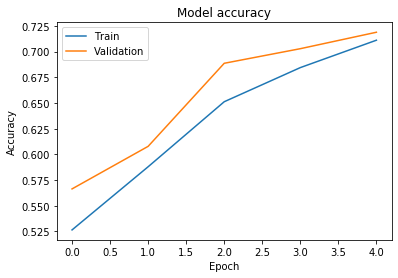

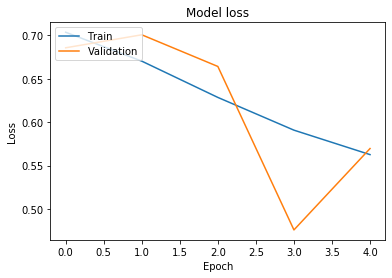

In [85]:
# Let's take a look at the accuracy of the model with validation and training data. 
# We do this to visualize that A) the model isn't over fitting, B) The model doesn't have high bias C) it's apprpriately learning.
# Judging from the plots, we can see that the model may have somewhat of a bias issue, but given the upward slope of the plots, we can assume with more successive epochs, the model would get better. (Again, I'm training on a CPU).

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values (cross entropy)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

As expected, over time the accuracy increases and the recorded losses decrease.

In [150]:
# We can predict the accuracy of our validation data in order to get a better numerical sense of the result.
_, acc = model.evaluate_generator(validation_data, steps=len(validation_data), verbose=0)
print('> %.3f' % (acc * 100.0))

> 71.880


In [256]:
# Now the fun part, we can predict our labels from the validation data, and compare it to the true labels.
# This will help us see if we're overfitting/underfitting.
validation_preds_classic = model.predict_generator(validation_data, verbose=1, workers=0)

79/79 [==============================] - 91s 1s/step


In [257]:
# To get a better sense of how well the model did at predicting certain categories, we can use a confusion matrix to visualize it's accuracy.
from sklearn.metrics import confusion_matrix

# Labels from the validation set.
y_true = validation_data.labels

# We need to round the data to 0s and 1s, as our predictions are probabilities.
f = lambda x: 0 if x <= 0.5 else 1
y_pred = np.array([f(xi) for xi in validation_preds_classic.T[0]])

# Create a confusion matrix. where 0 is cat and 1 is dog. Looks like the validation data guesses cat more often.
cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
cm

array([[2096,  404],
       [1114, 1386]])

Nice, that puts us at around 70% accuracy, which is better than just guessing. We also see that we're more likely to guess 'cat'.

In [260]:
# To calculate the cross-entropy error, we call this function. We can use this to compare to the other model.
keras.losses.binary_crossentropy(y_true, y_pred).numpy()

4.675611

Here's the cross entropy error - we can use this to compare against the other model.

#### 5.2 With VGG-16 model

In [177]:
# The VGG-16 Model needs to be imported.

from keras.applications.vgg16 import VGG16
vgg16 = VGG16()

In [178]:
# Let's take a look at what we're working with.
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

As you can see, this model is much more in depth. What's more is that the weight's are already trained, so we need to only worry about training the a Dense layer to output 0's and 1's.

In [179]:
# Alright so that last Dense layer we don't really want because it's 1000 categories when we're only outputting 1s and 0s.
# Also to note that this is type keras.engine.training.Model. 
# We need to edit this model, so in the next step we'll change it to Sequential
type(vgg16)

keras.engine.training.Model

In [199]:
# Let's add this to a Sequential model so we can edit. We remove that last Dense layer since it predicts 1000 categories. We'll then add on a new one.
model = Sequential()
model.add(InputLayer(input_shape=(img_dim, img_dim, 3)))
for l in vgg16.layers[:-1]:
    model.add(l)
    
# Now we can add on that last 
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)     

In [200]:
# we don't want this to train and update the already learned weights, because they're already good enough!
for l in model.layers:
    l.trainable = False

In [201]:
# Same deal, need to compile this before I can use it. I opted here to use a new optimizer in order to explore other options. Not very scientific.
from keras.optimizers import SGD
model.compile(
    optimizer=SGD(lr=.001, momentum=0.9),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Note: This takes 9 hours to run, in the next step, I'll be importing data from my last successful run, and I added the output of running this in markdown below.
history = model.fit_generator(
    train_data,
    validation_data=validation_data,
    validation_steps=len(validation_data),
    epochs=5,
    steps_per_epoch=len(train_data),
    verbose=1
)

Epoch 1/5
313/313 [==============================] - 11950s 38s/step - loss: 0.4645 - accuracy: 0.7896 - val_loss: 0.3174 - val_accuracy: 0.8502  
Epoch 2/5
313/313 [==============================] - 5882s 19s/step - loss: 0.3492 - accuracy: 0.8551 - val_loss: 0.4899 - val_accuracy: 0.8728  
Epoch 3/5
313/313 [==============================] - 5108s 16s/step - loss: 0.3189 - accuracy: 0.8682 - val_loss: 0.2468 - val_accuracy: 0.8788  
Epoch 4/5
313/313 [==============================] - 7657s 24s/step - loss: 0.3011 - accuracy: 0.8738 - val_loss: 0.2686 - val_accuracy: 0.8834  
Epoch 5/5
313/313 [==============================] - 7749s 25s/step - loss: 0.2941 - accuracy: 0.8778 - val_loss: 0.3305 - val_accuracy: 0.8854  

In [ ]:
# Unfortunately I didn't run this when I had the history variable saved.

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [245]:
# Loading in my best trained data for analysis
from keras.models import load_model, model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")

# Need to compile before I can use it
loaded_model.compile(
    optimizer=SGD(lr=.001, momentum=0.9),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
print("Loaded model from disk")

Loaded model from disk


In [207]:
_, acc = loaded_model.evaluate_generator(validation_data, steps=len(validation_data), verbose=0)
print('> %.3f' % (acc * 100.0))

> 88.540


In [249]:
validation_preds = loaded_model.predict_generator(validation_data, verbose=1, workers = 0)

79/79 [==============================] - 1263s 16s/step


In [262]:
# Creating a confusion matrix
from sklearn.metrics import confusion_matrix

# Labels from the validation set.
labels = validation_data.labels

# We need to round the data to 0s and 1s, as our predictions are probabilities.
f = lambda x: 0 if x <= 0.5 else 1
y_pred_vgg16 = np.array([f(xi) for xi in validation_preds.T[0]])

# Create a confusion matrix.
cm = confusion_matrix(labels, y_pred_vgg16, labels=[0, 1])
cm

array([[2317,  183],
       [ 390, 2110]])

In [263]:
keras.losses.binary_crossentropy(labels, y_pred_vgg16).numpy()

1.7643414

It looks like this model predicted with 88.54% accuracy! and has a lower cross-entropy error than our previous model. We've also reduced the heavy cat predictions from the previous model.

Let's test on some test data!

In [232]:
test_images, test_labels = next(test_data)

In [233]:
preds = loaded_model.predict_on_batch(test_images)

In [234]:
# Let's show some predictions!
def plot(prediction):
    print(prediction[0])
    prediction_class = np.argmax(prediction[0][0])
    print(prediction_class)

    title = "cat" if prediction[0][0] <= 0.5 else "dog"
    plt.imshow(prediction[1],aspect='equal')
    plt.title(title)
    plt.show();
show_predictions = map(plot, list(zip(preds,test_images)))

[0.19529478]
0


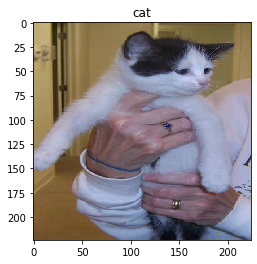

None
[0.9908496]
0


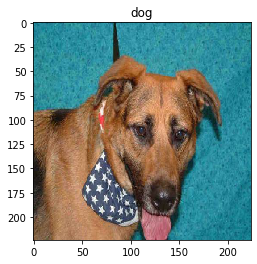

None
[0.03363456]
0


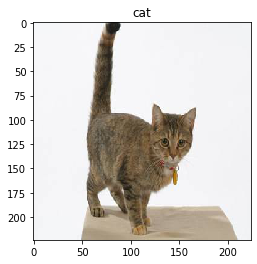

None
[0.99683553]
0


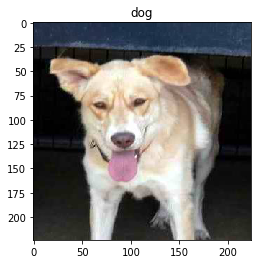

None
[0.9862213]
0


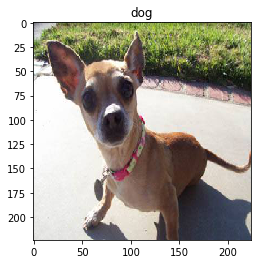

None


In [235]:
print(next(show_predictions))
print(next(show_predictions))
print(next(show_predictions))
print(next(show_predictions))
print(next(show_predictions))

## 6. Deployment to the Cloud (GCP)

[Check out this Google App Engine Link](https://cats-vs-dogs-268802.appspot.com/)

I deployed a docker container running a Flask application to GAE. The models are stored in a bucket, that's fetched and stored in memory upon intialization.

The frontend is primative, but it's growing on me. 

# Further Reading
https://towardsdatascience.com/types-of-convolution-kernels-simplified-f040cb307c37
https://link.springer.com/article/10.1007/s11042-017-4837-0#citeas